# kNN Classification for classifying Mushrooms

## Summary:



*   Training data is split into training and validation sets with the ratio 80%:20% .
*   Various experiments are done on subset of data to find optimal k & distance metric, these are tested against validation test. Final results are measured on given test dataset.
*   Random classifier is implemented to get a baseline accuracy. Random classifier just selects random class for each test, which gives 10% accuracy, which is expected since there are 10 classes.
*   scikit-learn kNN is also run on the subset and entire dataset for comparison.

## Observations:


* Optimal k range : 1<=k<=9  ( k should be odd )
* Distance metrics used : Hamming Distance
* All of the distance metrics and K give much better results than baseline random classifier algorithm.
* On the given dataset, accuracy is 100%, which is as good as scikit-learn classification.

## Best Performance Results:

#### Euclidean Distance
K = 1


*   Accuracy : 100.0%

* F-1 score for class with label: 0 is 1.0
* F-1 score for class with label: 1 is 1.0

* Mean F-1 score is 1.0 +/- 0.0
* Median F-1 score is 1.0 +/- 0.0




# Basic kNN




## Distance Parameter : 

1.   Hamming Distance

## K Parameter : 

1.   K = 1
2.   K = 3
3.   K = 5
4.   K = 7
5.   K = 9
6.   K = 11
7.   K = 13

In [4]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import heapq as hp
import collections as cl

class KNNClassifier:

    def train(self,filename):
        self.k = 3
        self.dist = lambda x,y : sum(x[i]!=y[i] for i in range(len(x)))
        df = pd.read_csv(filename, header=None)
        self.to_drop = []
        for column in df.columns:
            if df[column].mode()[0] == '?':
                self.to_drop += [column]
                continue
            df[column].replace('?',df[column].mode()[0], inplace=True)
        df = df.drop(columns=self.to_drop)
        train=df.sample(frac=0.8,random_state=200) 
        self.train_df = train
        test=df.drop(train.index)
        test_x, test_y = test.drop(columns=test.columns[0]), test[test.columns[0]]
        accuracies = []
        print("Testing Hamming Distance Parameter against validation set:")
        for k in range(1,10):
            print("K is ",k)
            predictions = self.predict_data(test_x,k)
            acc = accuracy_score(test_y,predictions)
            accuracies += [acc]
            print("Accuracy : ", acc)
        ind = accuracies.index(max(accuracies))
        print("Best k is found to be ", ind+1)
        self.k = ind+1

    def predict(self, filename):
        predict_df = pd.read_csv(filename, header=None)
        return self.predict_data(predict_df, self.k)

    def predict_data(self,predict_df, k):
        predict_df = predict_df.drop(columns=self.to_drop)
        for column in predict_df.columns:
            predict_df[column].replace('?',predict_df[column].mode()[0], inplace=True)
        predictions = []
        for inp_row in predict_df.itertuples():
            heap = []
            for row in self.train_df.itertuples():
                dis = self.dist(row[2:],inp_row[1:])
                if len(heap) == k:
                    hp.heappushpop(heap, (-1*dis, row[1]))
                else:
                    hp.heappush(heap, (-1*dis, row[1]))
            closest_classes = [clos for _,clos in heap]
            predictions += [cl.Counter(closest_classes).most_common(1)[0][0]]
        return predictions
  
knn_classifier = KNNClassifier()
knn_classifier.train('./Datasets/q2/train.csv')
predictions = knn_classifier.predict('./Datasets/q2/test.csv')
test_labels = list()
with open("./Datasets/q2/test_labels.csv") as f:
  for line in f:
    test_labels.append(line.strip())
print("Final accuracy score against test dataset is:")
print (accuracy_score(test_labels, predictions))

Testing Hamming Distance Parameter against validation set:
K is  1
Accuracy :  1.0
K is  2
Accuracy :  1.0
K is  3
Accuracy :  1.0
K is  4
Accuracy :  1.0
K is  5
Accuracy :  1.0
K is  6
Accuracy :  1.0
K is  7
Accuracy :  1.0
K is  8
Accuracy :  0.9988876529477196
K is  9
Accuracy :  0.9988876529477196
Best k is found to be  1
Final accuracy score against test dataset is:
1.0


### Testing Part : 

Following metrics are calculated to evaluate the performance of the algorithm


*   Accuracy Score
*   F1 Score 
*   Confusion Matrix
*   Accuracy vs K Plot


In [0]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
test_labels = list()

def fone(cur,test_labels,predictions):
  trues = [0]*len(predictions)
  predicteds = [0]*len(predictions)
  for i in range(len(predictions)):
    trues[i] = 1 if test_labels[i] == cur else 0
    predicteds[i] = 1 if predictions[i] == cur else 0
  return f1_score(trues,predicteds)

def calc_mad(x):
  med = np.median(x)
  return med,np.median([abs(i-med) for i in x])

with open("./Datasets/q2/test_labels.csv") as f:
  for line in f:
    if str(line).strip() == 'e':
      test_labels.append(1)
    else:
      test_labels.append(0)

def tester(k_list):
  if len(k_list) == 0:
    print("ERROR: No K parameters are given")
    return
  accuracies = []
  knn_classifier = KNNClassifier()
  knn_classifier.train('./Datasets/q2/train.csv')
  for k in k_list:
    print("K is "+str(k))
    predictions = knn_classifier.predict('./Datasets/q2/test.csv',k)
    acc = accuracy_score(test_labels, predictions)
    accuracies += [acc*100]
    print("Accuracy : "+str(acc*100)+"%")
    print("Confusion Matrix:")
    conf = confusion_matrix(test_labels, predictions)
    print(conf)
    fone_arr = []
    lbls = ["e","p"]
    print("F-1 score is ", f1_score(test_labels,predictions))

  if len(k_list) == 1: return
  plt.plot(k_list,accuracies)
  plt.ylabel('Accuracy (%)')
  plt.xlabel('K')
  plt.show()



Hamming distance is the most useful distance metric for this system.
Following are the results against different K.

K is 1
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 2
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 3
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 4
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 5
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 6
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 7
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 8
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 9
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 10
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 11
Accuracy : 100.0%
Confusion Matrix:
[[495   0]
 [  0 505]]
F-1 score is  1.0
K is 12
Accuracy : 99.9%
Confusion Matrix:
[[494   1]
 [  0 505]]
F-1 scor

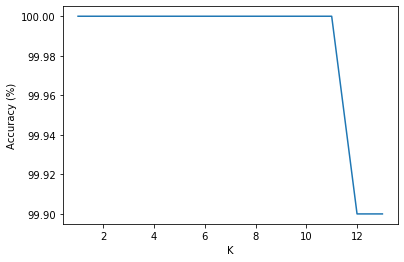

In [59]:
tester(range(1,14))

# Random Guessing




Since we are classifying data into 10 classes, we can take 10% as the baseline accuracy.

Following is an implementation of randomly guessing hand written digit.

In [0]:
import numpy as np
import pandas as pd

class KNNClassifier:

    def train(self,filename):
        pass

    def predict(self,filename,k):
        predict_df = pd.read_csv(filename, header=None)
        return np.random.randint(0,2,len(predict_df))

For baseline algorithm to randomly decide class, K or distance parameter doesn't matter

In [48]:
tester([1])

K is 1
Accuracy : 49.1%
Confusion Matrix:
[[256 239]
 [270 235]]
F-1 score is  0.48008171603677224


# Scikit-learn's kNN Classifier



In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNNClassifier:

    def train(self,filename):
        df = pd.read_csv(filename, header=None)
        self.to_drop = []
        for column in df.columns:
            if df[column].mode()[0] == '?':
                self.to_drop += [column]
                continue
            df[column].replace('?',df[column].mode()[0], inplace=True)
        df = df.drop(columns=self.to_drop)
        self.X = df.drop(columns=df.columns[0])
        self.y = df[df.columns[0]].values
        self.X = pd.get_dummies(self.X)
        self.y = pd.get_dummies(self.y)

    def predict(self,filename,k):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3)
        self.neigh = KNeighborsClassifier(n_neighbors=k)
        self.neigh.fit(X_train, y_train)
        return y_test,self.neigh.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
test_labels = list()

def fone(cur,test_labels,predictions):
  trues = [0]*len(predictions)
  predicteds = [0]*len(predictions)
  for i in range(len(predictions)):
    trues[i] = 1 if test_labels[i] == cur else 0
    predicteds[i] = 1 if predictions[i] == cur else 0
  return f1_score(trues,predicteds)

def calc_mad(x):
  med = np.median(x)
  return med,np.median([abs(i-med) for i in x])

with open("./Datasets/q2/test_labels.csv") as f:
  for line in f:
    if str(line).strip() == 'e':
      test_labels.append(1)
    else:
      test_labels.append(0)

def tester(k_list):
  if len(k_list) == 0:
    print("ERROR: No K parameters are given")
    return
  accuracies = []
  knn_classifier = KNNClassifier()
  knn_classifier.train('./Datasets/q2/train.csv')
  for k in k_list:
    print("K is "+str(k))
    tl,predictions = knn_classifier.predict('./Datasets/q2/test.csv',k)
    acc = accuracy_score(tl, predictions)
    accuracies += [acc*100]
    print("Accuracy : "+str(acc*100)+"%")

  if len(k_list) == 1: return
  plt.plot(k_list,accuracies)
  plt.ylabel('Accuracy (%)')
  plt.xlabel('K')
  plt.show()

### Train on entire dataset

K is 1
Accuracy : 100.0%
K is 2
Accuracy : 100.0%
K is 3
Accuracy : 100.0%
K is 4
Accuracy : 99.85174203113417%
K is 5
Accuracy : 100.0%
K is 6
Accuracy : 100.0%
K is 7
Accuracy : 99.85174203113417%
K is 8
Accuracy : 99.85174203113417%
K is 9
Accuracy : 99.85174203113417%
K is 10
Accuracy : 99.9258710155671%
K is 11
Accuracy : 99.9258710155671%
K is 12
Accuracy : 99.70348406226834%
K is 13
Accuracy : 100.0%


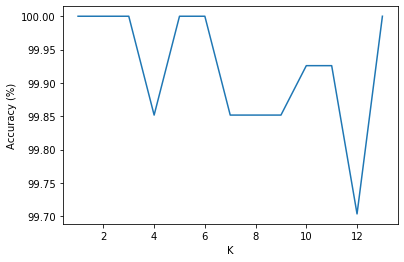

In [67]:
tester(range(1,14))